# Description for Modules
pandas-> read our csv files

numpy-> convert the data to suitable form to feed into the classification data

seaborn and matplotlib-> For visualizations

sklearn-> To use logistic regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from google.colab import files
uploaded = files.upload()
from sklearn.linear_model import LogisticRegression

Saving diabetes.csv to diabetes.csv


# Reading the "diabetes.csv"

# The following features have been provided to help us predict whether a person is diabetic or not:
* **Pregnancies**: Number of times pregnant

* **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

* **BloodPressure**: Diastolic blood pressure (mm Hg)

* **SkinThickness**: Triceps skin fold thickness (mm)

* **Insulin**: 2-Hour serum insulin (mu U/ml)

* **BMI**: Body mass index (weight in kg/(height in m)2)

* **DiabetesPedigreeFunction**: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

* **Age**: Age (years)

* **Outcome**: Class variable (0 if non-diabetic, 1 if diabetic)




In [ ]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In the above data, you can see that there are many missing values in 

* **Insulin**

* **skin thickness**

* **blood pressure**

We could replace the missing values with the mean of the respective features

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


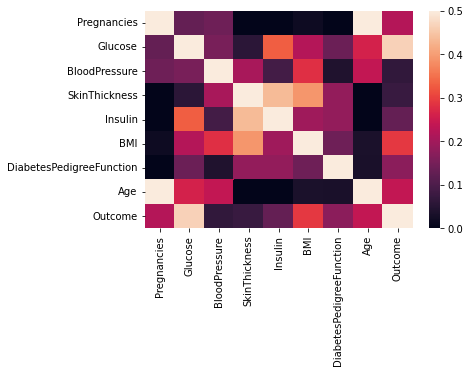

In [ ]:
corr = diabetes_df.corr()
print(corr)
sns.heatmap(corr,
            xticklabels = corr.columns,
            yticklabels = corr.columns,
            vmin = 0, vmax = 0.5)

In the above heatmap, brighter colours indicate more correlation.


> **Glucose**, **# of pregnancies**, **BMI** and **age** have significant correlation with **outcome** variable.

> Other correlation like **age**->**pregnancies**, **BMI**-> **skin thickness**, **Insulin**-> **skin thickness**




In [ ]:
outcome = diabetes_df["Outcome"]
outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

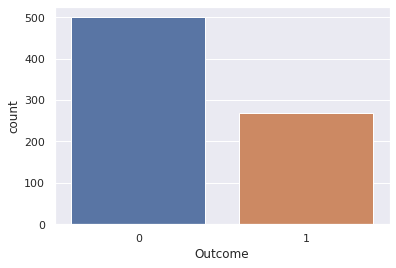

In [ ]:
sns.set_theme(style = "darkgrid", palette = "deep")
sns.countplot(x = 'Outcome', data = diabetes_df)

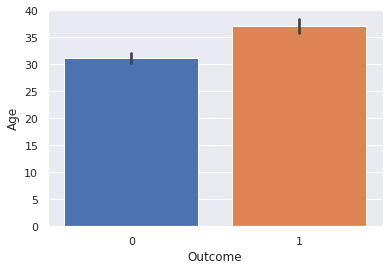

In [ ]:
sns.set_theme(style = "darkgrid", palette = "deep")
sns.barplot(x = 'Outcome', y = "Age", data = diabetes_df, saturation = 1.6)

# Data Preparation

splitting the data into:
* **Training Data**
* **Test Data**
* **Check Data**

In [ ]:
dfTrain = diabetes_df[:650]
dfTest = diabetes_df[650:750]
dfcheck = diabetes_df[750:]

**Separating label and features for both training and testing**

In [ ]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop("Outcome", 1))

testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop("Outcome", 1))

In [ ]:
means = np.mean(trainData, axis = 0)
stds = np.std(trainData, axis = 0)
trainData = (trainData - means) / stds
testData = (testData - means) / stds

In [ ]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [ ]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%") 

accuracy =  78.0 %
